# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

* Choose with is the algorithm you want to use by uncommenting.

    ```
    #For a DDPG agent
    agent = DDPG_Agent(state_size=state_size, action_size=action_size, random_seed=0, num_agents=20)
    ```

    or

    ```
    #For a D4PG agent
    agent = D4PG_Agent(state_size=state_size, action_size=action_size, random_seed=0)
    ```

In [5]:
from ddpg_agent import Agent as DDPG_Agent
from d4pg_agent import Agent as D4PG_Agent

import ddpg_agent
import d4pg_agent

In [77]:
# For a DDPG agent
# agent = DDPG_Agent(state_size=state_size, action_size=action_size, random_seed=0, num_agents=20)

# For a D4PG agent
agent = D4PG_Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [7]:
## Define the training function
TARGET_SCORE = 30
WINDOW_SIZE = 100

def training(n_episodes=2000, max_t=1000):
    """Deep Deterministic Policy Gradients (DDPG) or 
    Distributional Distributed Deep Deterministic Policy Gradients (D4PG).
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []      # episodic scores
    scores_window = deque(maxlen=WINDOW_SIZE)
    window_avg = []  # average over 100 episodes for 20 agents (mean score of episode)

    ## Perform n_episodes of training
    absolute_start_time = time.time()
    
    for i_episode in range(1, n_episodes+1):
        episode_start_time = time.time()
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations  # get the next states
        episode_scores = np.zeros(num_agents)           # rewards per episode for each agent

        for t in range(1, max_t+1):
            actions = agent.act(states)                 # select the next action for each agent
            env_info = env.step(actions)[brain_name]    # send the actions to the environment
            rewards = env_info.rewards                  # get the rewards
            next_states = env_info.vector_observations  # get the next states
            dones = env_info.local_done                        # see if episode finished
            # Send the results to the Agent
            #for (state, action, reward, next_state, done) in zip(states, actions, rewards, next_states, dones):
            #    agent.step(state, action, reward, next_state, done, t)
            agent.step(states, actions, rewards, next_states, dones, t)
            # Update the variables for the next iteration
            states = next_states
            episode_scores += rewards
            
            if np.any(dones):                                  # exit loop if episode finished
                break
            

        # Store the rewards and calculate the moving average
        scores.append(episode_scores.tolist())
        scores_window.append(episode_scores.tolist())
        window_avg.append(np.mean(scores_window, axis = 0))
        # Calculate the elapsed time
        time_episode = time.time() - episode_start_time
        time_elapsed = time.time() - absolute_start_time
        time_episode_str = time.strftime('%Mm%Ss', time.gmtime(time_episode))

        ## Print the results for this episode
        print('({}) Episode {:3d} \tScore: {:5.2f} (Max: {:5.2f} -- Min: {:5.2f})\t Window average: {:5.2f}' \
              .format(time_episode_str, i_episode, episode_scores.mean(),
                      episode_scores.max(), episode_scores.min(),
                      window_avg[-1].mean()))

        ## Check if the environment has been solved
        if window_avg[-1].mean() >= TARGET_SCORE and i_episode >= WINDOW_SIZE:
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            print('\nThis environment was solved in {:d} episodes!\t' \
                  'Window Average Score: {:.2f} over {} episodes \tElapsed time: {}'
                  .format(i_episode-WINDOW_SIZE, window_avg[-1].mean(), WINDOW_SIZE,
                          time_elapsed_str))
            
            ## Save the model along with some training information
            checkpoint = {
                'actor_dict': agent.actor_local.state_dict(),
                'critic_dict': agent.critic_local.state_dict(),
                'ddpg_params': {
                    'batch_size': ddpg_agent.BATCH_SIZE,
                    'buffer_size': ddpg_agent.BUFFER_SIZE,
                    'gamma': ddpg_agent.GAMMA,
                    'lr_actor': ddpg_agent.LR_ACTOR,
                    'lr_critic': ddpg_agent.LR_CRITIC,
                    'tau': ddpg_agent.TAU,
                    },
                'episodes': i_episode,
                'elapsed_time': time_elapsed_str,
                'scores': scores,
                'moving_avg': window_avg,
                }
            print('\nSaving model ...', end=' ')
            torch.save(checkpoint, 'checkpoint_test.pt')
            print('done.')

            break

    return scores, window_avg

scores, moving_avg = training()

/Users/juanalvarez/Documents/Reinforcement_Learning/Exercises-deep-reinforcement-learning/p2_continuous-control/ddpg_agent.py:113: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


(00m15s) Episode   1 	Score:  0.80 (Max:  2.15 -- Min:  0.20)	 Window average:  0.80
(00m15s) Episode   2 	Score:  0.92 (Max:  2.68 -- Min:  0.07)	 Window average:  0.86
(00m15s) Episode   3 	Score:  0.80 (Max:  2.17 -- Min:  0.14)	 Window average:  0.84
(00m15s) Episode   4 	Score:  0.66 (Max:  1.79 -- Min:  0.00)	 Window average:  0.79
(00m15s) Episode   5 	Score:  0.94 (Max:  3.04 -- Min:  0.27)	 Window average:  0.82
(00m15s) Episode   6 	Score:  1.01 (Max:  2.67 -- Min:  0.25)	 Window average:  0.86
(00m15s) Episode   7 	Score:  0.65 (Max:  1.65 -- Min:  0.00)	 Window average:  0.83
(00m16s) Episode   8 	Score:  0.89 (Max:  1.92 -- Min:  0.07)	 Window average:  0.83
(00m16s) Episode   9 	Score:  1.12 (Max:  2.01 -- Min:  0.46)	 Window average:  0.87
(00m17s) Episode  10 	Score:  0.82 (Max:  1.68 -- Min:  0.07)	 Window average:  0.86
(00m16s) Episode  11 	Score:  0.99 (Max:  2.14 -- Min:  0.15)	 Window average:  0.87
(00m16s) Episode  12 	Score:  1.20 (Max:  3.49 -- Min:  0.48)	 Wi

(00m17s) Episode  98 	Score: 30.71 (Max: 38.43 -- Min: 27.04)	 Window average: 24.88
(00m16s) Episode  99 	Score: 27.08 (Max: 30.65 -- Min: 23.69)	 Window average: 24.90
(00m16s) Episode 100 	Score: 25.41 (Max: 32.00 -- Min:  6.65)	 Window average: 24.91
(00m16s) Episode 101 	Score: 24.74 (Max: 39.51 -- Min: 16.03)	 Window average: 25.15
(00m16s) Episode 102 	Score: 25.05 (Max: 38.65 -- Min: 16.54)	 Window average: 25.39
(00m16s) Episode 103 	Score: 24.10 (Max: 37.72 -- Min: 11.16)	 Window average: 25.62
(00m16s) Episode 104 	Score: 18.35 (Max: 26.45 -- Min: 10.57)	 Window average: 25.80
(00m16s) Episode 105 	Score: 27.52 (Max: 35.14 -- Min: 21.20)	 Window average: 26.06
(00m16s) Episode 106 	Score: 29.58 (Max: 38.06 -- Min: 20.44)	 Window average: 26.35
(00m17s) Episode 107 	Score: 28.21 (Max: 32.91 -- Min: 18.23)	 Window average: 26.62
(00m16s) Episode 108 	Score: 29.16 (Max: 35.29 -- Min: 14.85)	 Window average: 26.91
(00m17s) Episode 109 	Score: 34.33 (Max: 38.13 -- Min: 29.32)	 Wi

### 5. Evaluation

Here, you can evaluate your agent loading your trained model.

* You should also change the checkpoint name
   ```
    #For a DDPG agent
    checkpoint = torch.load('checkpoint_learning.pt',map_location={'cuda:0': 'cpu'})
   ```
   * checkpoint_learning.pt
   * checkpoint_learning_35.pt
   * checkpoint_128_128.pt
   * checkpoint_2_1.pt
  
    or

    ```
    #For a D4PG agent
    checkpoint = torch.load('checkpoint_d4pg_35.pt',map_location={'cuda:0': 'cpu'}`
   ```
   * checkpoint_d4pg_35.pt
   * checkpoint_d4pg_38.pt

In [84]:
#For a DDPG agent
#checkpoint = torch.load('checkpoint_learning.pt',map_location={'cuda:0': 'cpu'})
#checkpoint = torch.load('checkpoint_learning_35.pt',map_location={'cuda:0': 'cpu'})
#checkpoint = torch.load('checkpoint_128_128.pt',map_location={'cuda:0': 'cpu'})
#checkpoint = torch.load('checkpoint_2_1.pt',map_location={'cuda:0': 'cpu'})

#For a D4PG agent
#checkpoint = torch.load('checkpoint_d4pg_35.pt',map_location={'cuda:0': 'cpu'})
checkpoint = torch.load('checkpoint_d4pg_38.pt',map_location={'cuda:0': 'cpu'})

agent.actor_local.load_state_dict(checkpoint['actor_dict'])

In [79]:
def print_checkpoint(checkpoint):
    print("BATCH_SIZE: {}\nBUFFER_SIZE: {}\nGAMMA: {}\nLR_ACTOR: {}\
          \nLR_CRITIC: {}\nTAU: {}\nsolved in: {} episodes\
          \ntraining time: {}".format(checkpoint['ddpg_params']['batch_size'],
                                    checkpoint['ddpg_params']['buffer_size'],
                                    checkpoint['ddpg_params']['gamma'],
                                    checkpoint['ddpg_params']['lr_actor'],
                                    checkpoint['ddpg_params']['lr_critic'],
                                    checkpoint['ddpg_params']['tau'],
                                    checkpoint['episodes']-100,
                                    checkpoint['elapsed_time']))

In [42]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states, add_noise=False)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 37.977499151136726


In [ ]:
env.close()

In [83]:
print_checkpoint(checkpoint)

BATCH_SIZE: 128
BUFFER_SIZE: 100000
GAMMA: 0.99
LR_ACTOR: 0.001          
LR_CRITIC: 0.001
TAU: 0.001
solved in: 63 episodes          
training time: 03h53m10s


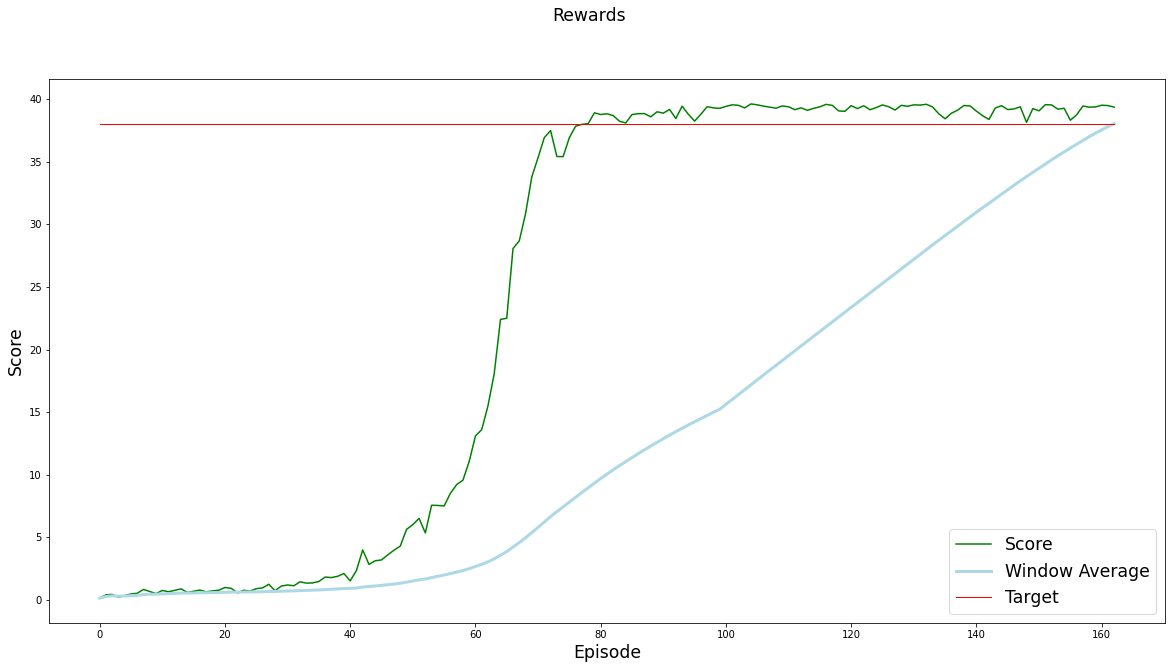

In [86]:
TARGET = 38

scores_mean = np.mean(checkpoint['scores'], axis=1)
moving_avg_mean = np.mean(checkpoint['moving_avg'], axis=1)

target = [TARGET] * len(checkpoint['scores']) 

# Plot the main graph with the scores and moving average
fig = plt.figure(figsize=(20,10))
fig.suptitle('Rewards', fontsize='xx-large')

ax = fig.add_subplot(111)
ax.plot(scores_mean, label='Score', color='Green')
ax.plot(moving_avg_mean, label='Window Average',
        color='LightBlue', linewidth=3)
ax.plot(target, label='Target', color='Red', linewidth=1 )
ax.set_ylabel('Score', fontsize='xx-large')
ax.set_xlabel('Episode', fontsize='xx-large')
ax.legend(fontsize='xx-large', loc='lower right')

plt.show()